# Análise de Componentes Principais Probabilísticas (PPCA)
---
A Análise de Componentes Principais (PCA) tem como objetivo combinar os atributos originais de um dataset em vetores de menor dimensão, reduzindo, assim, a dimensão dos dados. A idéia é encontrar uma matriz de projeção $\textbf{P} \in R^{L x D}$, a qual projeta um vetor $x_i \in R^D$ em $z_i \in R^L$, de forma que a variância dos dados projetados seja maximizada.

Seja $p_k \in R^D$ a *k-ésima* linha da matriz de projeção $\textbf{P}$, a variância dos dados projetados naquela componente, i.e., $z_{i1} = p_1^T x_i$ é:

$$ \sigma^2_1 = \frac{1}{N - 1} \sum^N_{i = 1}(p_1^T x_i - p_1^T \mu)^2 $$
$$\mu = \frac{1}{N} \sum^N_{i=1} x_i$$

A expressão acima pode ser trabalhada, de tal forma que a matriz de covariância $\Sigma$ dos dados originais apareça:

$$ \sigma^2_1 = p_1^T \Sigma p_1 $$
$$ \Sigma = \frac{1}{N - 1} \sum^N_{i = 1}(x_i - \mu)(x_i - \mu)^T $$

Ao tentar resolver a equação que maximiza a variância, encontramos que $\Sigma p_1 = \lambda_1 p_1$, sendo $\lambda_1$ corresponde ao maior autovalor de $\Sigma$ e, consequentemente, $p_1$ seu autovetor correspondente. Logo, podemos construir $\textbf{P}$ utilizando os autovetores correspondentes aos $L$ maiores autovalores.

### Uma perspectiva probabilística do PCA

Podemos pensar nos valores $z_i$ como variáveis latentes contínuas, as quais possuem distribuições Gaussianas. Seja $x \in R^D$ e $z \in R^L$, podemos definir uma priori Gaussiana para $z$, com média 0 e covariância 1:

$$ p(z) = \mathcal{N}(z | 0, I)$$

Para cada observação $x$, escolhemos uma probabilidade condicional também Gaussiana com uma relação linear com $z$:

$$ p(x | z) = \mathcal{N}(x | Wz + \mu, \sigma^2 I)$$

A partir da condicional, temos que a verossimilhança marginal da observação é dada por:

$$ p(x) = \int p(x | z) p(z) dz$$
$$ = \int \mathcal{N}(x | Wz + \mu, \sigma^2 I) \mathcal{N}(z | 0, I) dz$$
$$ = \mathcal{N}(x | \mu, W W^T + \sigma^2 I)$$

É importante ressaltar que $W$ não possui uma solução única. Suponha $\overline{W} = WR$, onde $R \in R^{LxL}$ é uma matriz ortogonal. Temos que:

$$ \overline{W} \overline{W}^T = WR(WR)^T = WRR^TW^T = WW^T $$

Logo, qualquer matriz de rotação ortogonal $R$ não altera o modelo.

Precisamos, então, encontrar valores para $W$, $\mu$ e $\sigma^2$ que maximizem a verossimilhança:

$$ \log p(X | W, \mu, \sigma^2) = \prod^N_{i=1} p(x_i | W, \mu, \sigma^2)$$

Realizando a otimização, podemos estimar os valores, de maneira analítica, com as seguintes equações:

$$ \mu = \frac{1}{N} \sum^N_{i=1}x_i $$

$$\sigma^2 = \frac{1}{D - L} \sum^D_{j = L + 1} \lambda_j $$

$$ W = V(\Lambda - \sigma^2 I)^{\frac{1}{2}}R $$

, onde:

- $V \in R^{DxL}$ é formada pelos $M$ autovetores da matriz de covariância $\Sigma$ das observações;
- $\Lambda \in R^{LxL}$ é uma matriz diagonal formada pelos $M$ maiores autovalores de $\Sigma$;
- $R \in R^{LxL}$ é uma matriz ortogonal qualquer (por simplicidade, podemos usar $R = I$).

A partir das estimações, podemos encontrar a psoteriori de $z_i$ de aneira analítica:

$$p(z_i | x_i) \propto \mathcal{N}(z_i | M^{-1} W^T (x_i - \mu), \sigma^2 M^{-1}) $$ 

$$ M = W^TW + \sigma^2 I $$

Dessa forma, temos a *Análise das Componentes Principais Probabilística* (PPCA)

## Expectation Maximization

Podemos resolver o problema do PPCA utilizando a técnica de *expectation maximization*. Entretanto, é importante informar que a matriz $W$ encotnrada não é, necessariamente, ortogonal.

Como todo método de EM, começamos analisando a log-verossimilhança dos dados completos (observações e projeções):

$$\log p(X, Z | \mu, W, \sigma^2) = \sum^N_{i=1}[\log p(x_i | z_i) + \log p(z_i)]$$
$$= \sum^N_{i=1} [\log \mathcal{N}(x_i | W z_i + \mu, \sigma^2 I) + \log \mathcal{N}(z_i | 0, I)]$$
$$= - \sum^N_{i=1} \{\frac{D}{2} \log (2 \pi \sigma^2) + \frac{L}{2} \log (2 \pi) + \frac{1}{2} Tr(z_i z_i^T) \\
+ \frac{1}{2\sigma^2} ||x_i - \mu||^2 - \frac{1}{\sigma^2} z_i^T W^T (x_i - \mu) + \frac{1}{2 \sigma^2} Tr(z_i z_i^T W^T W)
\}$$

No passo E, precisamos calcular duas esperanças (que serão usadas na etapa M):

$$ E[z_i] = M^{-1} W^T (x - \mu)$$

$$ E[z_i z_i^T] = \sigma^2 M^{-1} + E[z_i] E[z_i]^T $$

No passo M, podemos estimar os valores de $W$ e $\sigma^2$ por:

$$ W_{new} = \left[ \sum^N_{i = 1} (x-\mu) E[z_i]^T\right] \left[ \sum^N_{i=1} E[z_i z_i^T] \right] ^{-1} $$

$$ \sigma^2 = \frac{1}{ND} \sum^N_{i=1} \{||x_i - \mu||^2 - 2E[z_i]^T W_{new}^T (x_i - \mu) + Tr(E[z_i z_i^T] W_{new}^T W_{new})\}$$

**OBS:** As funções de projeção e reconstrução se mantêm.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
_ = plt.gray() # colocando as imagens para escala de cinza

<Figure size 432x288 with 0 Axes>

Existem 2 fontes do dataset que podemos usar:
- Keras, que possui imagens com resolução 28x28
- Sklearn, que possui imagens com resolução 8x8

In [2]:
from keras.datasets import mnist
(images, labels), _ = mnist.load_data()
images = images[labels == 5]
N, resolution_x, resolution_y = images.shape
N, resolution_x, resolution_y

(5421, 28, 28)

In [3]:
# from sklearn.datasets  import load_digits
# mnist = load_digits()
# images = mnist.images[mnist.target == 5]
# N, resolution_x, resolution_y = images.shape
# N, resolution_x, resolution_y

Vamos visualizar uma pequena amostra do nosso dataset

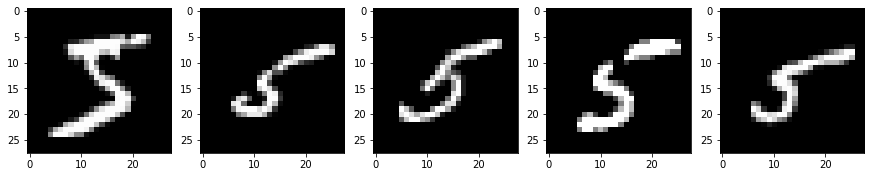

In [4]:
n_samples = 5
plt.figure(figsize=(15,5))
for i in range(n_samples):
    plt.subplot(1,n_samples, i+1)
    plt.imshow(images[i])

Para implementarmos o PPCA, vamos *achatar nossas imagens*, ou seja, transformá-las em vetores de 1 dimensão

In [5]:
X = images.reshape(N, resolution_x*resolution_y)
_, D = X.shape

Abaixo, temos o PPCA implementado utilizando a técnica de *Expectation Maximization*

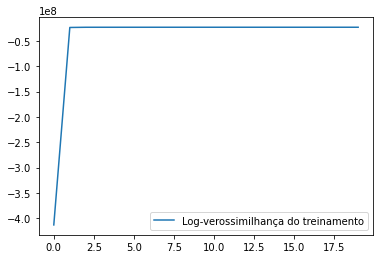

In [6]:
def log_likelihood(X, mean, W, M_inv, sigma, L):
    s = 0
    for x in X:
        z =  M_inv.dot(W.T).dot((x - mean))
        
        s += (D/2)*np.log(2*np.pi*sigma) + (L/2)*np.log(2*np.pi) + 0.5*np.trace(np.outer(z,z))
        s += (1/(2*sigma))*np.linalg.norm(x - mean)**2 - (1/sigma)*z.dot(W.T).dot(x-mean)
        s += 1/(2*sigma)*np.trace(np.outer(z,z).dot(W.T).dot(W))
        
    return -s
    
def fit(X, mean, W_0, sigma_0, L, iter=10, debug=False):
    W = W_0.copy()
    sigma = sigma_0
    M_inv = None
    
    log_likelihoods = []
    
    for i in range(iter):
        M_inv = np.linalg.inv(W.T.dot(W) + sigma*np.eye(L))

        e_z = M_inv.dot(W.T).dot((X - mean).T)
        e_zz = sigma*M_inv + e_z.dot(e_z.T)
        
        W = ((X - mean).T.dot(e_z.T)).dot(np.linalg.inv(e_zz))
        
        s = 0
        for i,x in enumerate(X):
            e_zi = e_z[:,i]
            e_zzi = sigma*M_inv + np.outer(e_zi, e_zi) 
            s += np.linalg.norm(x-mean)**2 - 2*e_zi.T.dot(W.T).dot(x-mean) + np.trace(e_zzi.dot(W.T).dot(W))
            
        sigma = s/(N*D)  

        log_likelihoods.append(log_likelihood(X, mean, W, M_inv, sigma, L))
        
        if debug:
            print("\n-----------------------------------\n")
            print(f"Iteração {i+1}")
            print(f"W:\n{W}")
            print(f"Sigma: {sigma}")
            print(f"Log-verossimilhança: {log_likelihoods[-1]}")
            
    return W, sigma, M_inv, log_likelihoods

L = 2
mean = np.mean(X, axis=0)
W_0 = np.random.randn(D, L)
W, sigma, M_inv, log_likelihoods = fit(X, mean, W_0, 1, L, iter=20, debug=False)
plt.plot(log_likelihoods, label="Log-verossimilhança do treinamento")
_ = plt.legend()
#W, sigma, M_inv

Para projetar os dados no novo espaço, basta que calculemos a posteriori de $z_i$:

$$p(z_i | x_i) \propto \mathcal{N}(z_i | M^{-1} W^T (x_i - \mu), \sigma^2 M^{-1}) $$ 

$$ M = W^TW + \sigma^2 I $$

Por questões de simplicidade, podemos retornar $E[z_i] = M^{-1} W^T (x_i - \mu)$

In [7]:
def project(X, mean, M_inv, W, sigma):
    return M_inv.dot(W.T).dot((X - mean).T).T 

z = project(X, mean, M_inv, W, sigma)
z.shape

(5421, 2)

De maneira análoga, para encontrar o valor $x_i$ relacionado a uma projeção, basta que encontremos a probabilidade condicional de $x_i$ dado $z_i$:

$$ p(\overline{x}_i | z_i) = \mathcal{N}(\overline{x}_i | Wz_i + \mu, \sigma^2 I)$$

Assim como a projeção, vamos retornar apenas $E[\overline{x}_i] =  Wz_i + \mu$

Text(0.5, 1.0, 'Original')

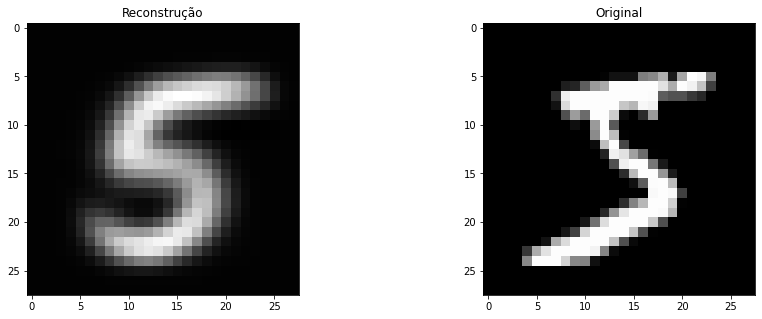

In [8]:
def reconstruct(z, mean, W, sigma):
    return W.dot(z.T).T + mean

x = reconstruct(z, mean, W, sigma)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(x[0].reshape(resolution_x, resolution_y))
plt.title("Reconstrução")
plt.subplot(1,2,2)
plt.imshow(images[0]) 
plt.title("Original")

Outra coisa interessante que podemos fazer, a partir dos dados treinados, é **gerar novas informações** a partir do espaço latente encontrado. Ou seja, partindo de uma varável latente $z_i$ que segue a distribuição a priori $ p(z) = \mathcal{N}(z| 0 , 1) $, basta que façamos amostragens aleatórias, seguindo a distribuição acima, para encontrar pontos no espaço latente e reconstruí-los no espaço original

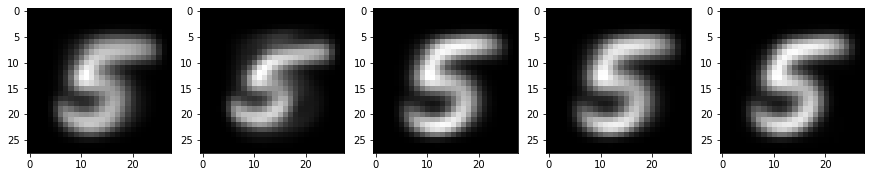

In [9]:
def generate_samples(L, mean, W, sigma, n_samples = 5):
    s = multivariate_normal.rvs(np.zeros(L), np.eye(L), size=n_samples)
    return reconstruct(s, mean, W, sigma)

img_generated = generate_samples(L, mean, W, sigma, n_samples = 5)
plt.figure(figsize=(15,5))
for i,img in enumerate(img_generated):
    plt.subplot(1,5, i+1)
    plt.imshow(img.reshape(resolution_x, resolution_y))

Vamos comparar como que os resultados mudam conforme aumentamos o espaço latente L

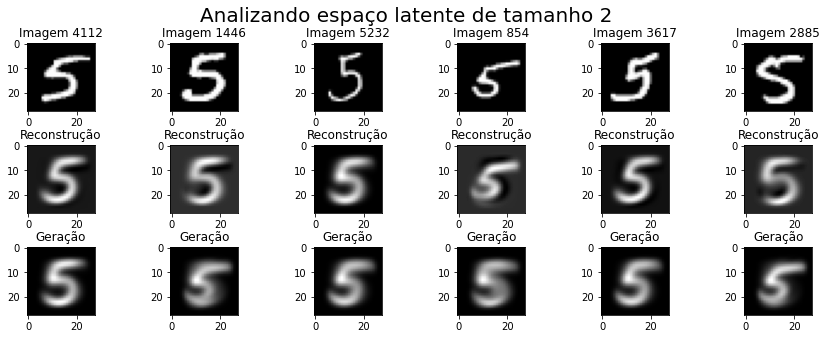

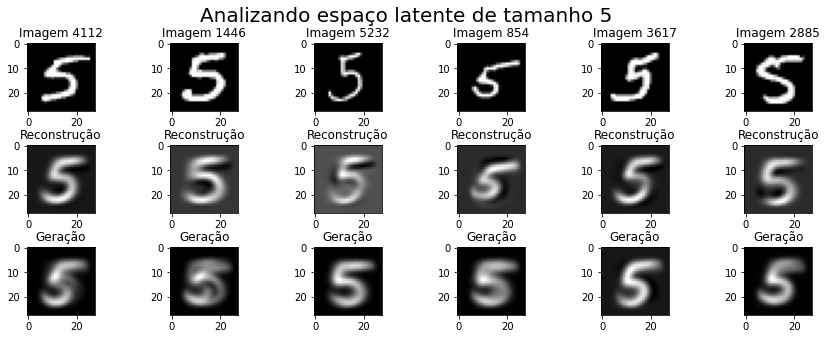

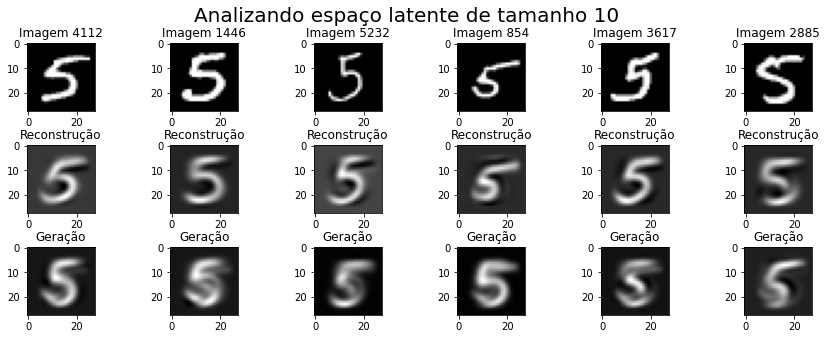

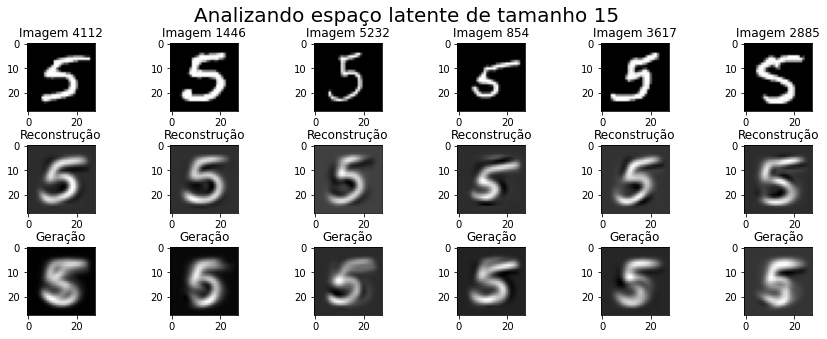

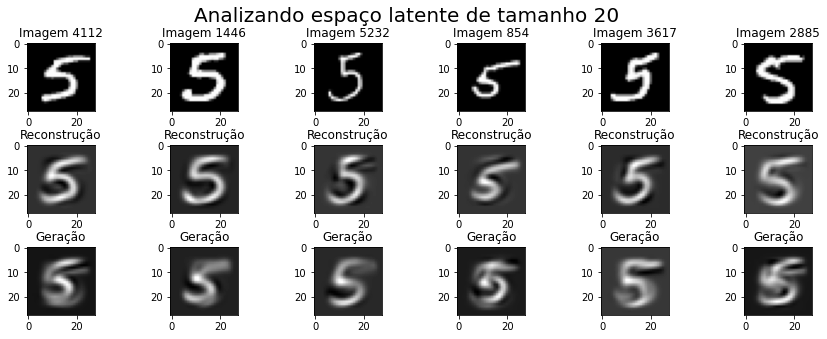

In [10]:
num_samples = 6
samples_index = np.random.choice(np.arange(X.shape[0]), size=num_samples, replace=False)

for L in [2, 5, 10, 15, 20]:
    W_0 = np.random.randn(D, L)
    W, sigma, M_inv, log_likelihoods = fit(X, mean, W_0, 1, L, iter=5, debug=False)
    
    projected_imgs = project(X[samples_index], mean, M_inv, W, sigma)
    
    reconstructed_imgs = reconstruct(projected_imgs, mean, W, sigma)\
                            .reshape(num_samples, resolution_x, resolution_y)
    
    generated_imgs = generate_samples(L, mean, W, sigma, num_samples)\
                            .reshape(num_samples, resolution_x, resolution_y)
    
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle(f"Analizando espaço latente de tamanho {L}", fontsize=20)
    for n in range(num_samples):
        plt.subplot(3,num_samples,n+1)
        plt.title(f"Imagem {samples_index[n]}")
        plt.imshow(images[samples_index[n]])
        
        plt.subplot(3,num_samples,n+num_samples+1)
        plt.title("Reconstrução")
        plt.imshow(reconstructed_imgs[n])
        
        plt.subplot(3,num_samples,n+2*num_samples+1)
        plt.title("Geração")
        plt.imshow(generated_imgs[n])